In [10]:
using PyCall
using AutomotiveSimulator
using AutomotiveVisualization

In [12]:
# read from current directory
pushfirst!(PyVector(pyimport("sys")."path"), "")
sys = pyimport("sys")
openDriveParser = pyimport("src.open_drive_parser")
openDriveRoadways = pyimport("src.open_drive_roadways")

PyObject <module 'src.open_drive_roadways' from '/Users/pegasus/Documents/Classes/FordSISLResearch/CarlaProject/src/open_drive_roadways.py'>

In [13]:
odp = openDriveParser.OpenDriveParser()

PyObject <src.open_drive_parser.OpenDriveParser object at 0x136980e48>

In [14]:
odp.parse_file("test_data/OpenDriveExs/Ex_Lane-Width.xodr")
println(odp.data.roads[1].lanes)

PyObject <src.open_drive_roadways.Road object at 0x14b186c50>


In [56]:
AutomotiveVisualization.colortheme["background"] = colorant"white"; # hide

In [57]:
roadway = gen_straight_roadway(4, 100.0)  # 100m long straight roadway with 4 lane

Roadway

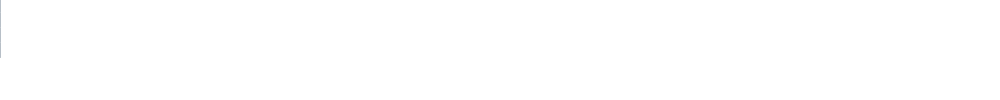

In [70]:
camera = StaticCamera(position=VecE2(200,0.0), zoom=5, canvas_height=100)
snapshot = render([roadway], camera=camera)

In [61]:
for (i, r) in odp.data.roads
    println("id: ", i)
    println("road: ", r)
    println("length: ", r.length)
    laneIds = Set()
    for off in r.lanes.laneOffset
        println("offset ", off)
    end
    for sect in r.lanes.laneSection
        println("sect s ", sect.s)
        for (id, lane) in sect.left
            println("left ", id, " ", lane)
            push!(laneIds, id)
        end
        for (id, lane) in sect.center
            println("mid ", id, " ", lane)
            push!(laneIds, id)
        end
        for (id, lane) in sect.right
            println("right ", id, " ", lane)
            push!(laneIds, id)
        end
    end
    println(laneIds)
    numLanes = length(laneIds)
    println(numLanes)
    global simple = gen_straight_roadway(numLanes, r.length)
end

id: 1
road: PyObject <src.open_drive_roadways.Road object at 0x14b186c50>
length: 100.0
sect s 0.0
left 1 PyObject <src.open_drive_roadways.Lane object at 0x14b191400>
mid 0 PyObject <src.open_drive_roadways.Lane object at 0x14b191550>
right -2 PyObject <src.open_drive_roadways.Lane object at 0x14b191320>
right -1 PyObject <src.open_drive_roadways.Lane object at 0x14b191470>
sect s 50.0
left 1 PyObject <src.open_drive_roadways.Lane object at 0x14b191630>
mid 0 PyObject <src.open_drive_roadways.Lane object at 0x14b191780>
right -2 PyObject <src.open_drive_roadways.Lane object at 0x14b1915c0>
right -1 PyObject <src.open_drive_roadways.Lane object at 0x14b1916a0>
Set(Any[0, -2, -1, 1])
4


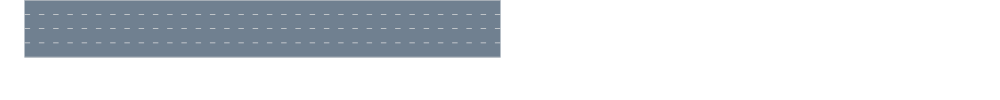

In [62]:
camera = StaticCamera(position=VecE2(100.0,0.0), zoom=4.75, canvas_height=100)
snapshot = render([simple], camera=camera)